In [1]:
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.3


In [2]:
pip install matplotlib --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [7]:
url = 'https://raw.githubusercontent.com/garg1709/Credit-Default-Classification/main/Training%20Data.csv'
df = pd.read_csv(url, sep=',')

In [8]:
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [10]:
# We can see that none of our variables are skewed too much.
df.skew()

Id                     0.000000
income                 0.005958
age                   -0.005315
experience            -0.012779
current_job_years      0.273146
current_house_years    0.006786
risk_flag              2.295734
dtype: float64

In [11]:
df.shape

(252000, 13)

In [12]:
df.isnull().sum()

Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

In [13]:
df.duplicated().sum()

0

0    221004
1     30996
Name: risk_flag, dtype: int64


Text(0.5, 1.0, 'Count of Defaulters and Non-Defaulters')

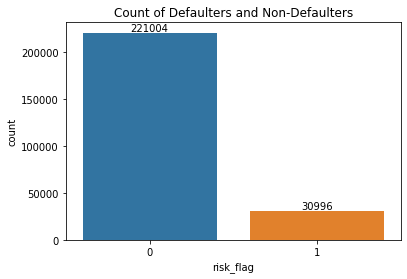

In [14]:
ax = sns.countplot(df['risk_flag'])
print(df['risk_flag'].value_counts())
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Count of Defaulters and Non-Defaulters")

In [15]:
lst0 = df['risk_flag'].value_counts()

In [16]:
print("Percentage of non-defaulters in our dataset :" + str(round(lst0[0]/(lst0[1]+lst0[0]),3)*100) + ' %')
print("Percentage of defaulters in our dataset :" + str(round(lst0[1]/(lst0[1]+lst0[0]),3)*100) + ' %')

Percentage of non-defaulters in our dataset :87.7 %
Percentage of defaulters in our dataset :12.3 %


In [17]:
# Our dataset is clearly imbalanced as it has a lot of values for non-defaulters and less for defaulters. 
# This will lead to performance issues when we get out of sample data for our model.
# We'll handle these when we will work on model building. For now, let's focus on exploring the dataset.

married  risk_flag
married  0             23092
         1              2636
single   0            197912
         1             28360
Name: risk_flag, dtype: int64


Text(0.5, 1.0, 'Count of Defaulters and Non-Defaulters segregated by Married and Single people')

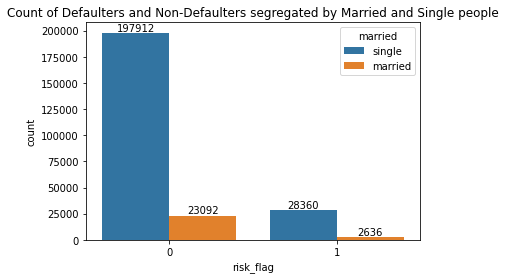

In [18]:
ax = sns.countplot(df['risk_flag'],hue=df['married'])
print(df.groupby(['married','risk_flag'])['risk_flag'].count())
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Count of Defaulters and Non-Defaulters segregated by Married and Single people")

In [19]:
lst = df.groupby(['married','risk_flag'])['risk_flag'].count()

In [20]:
lst

married  risk_flag
married  0             23092
         1              2636
single   0            197912
         1             28360
Name: risk_flag, dtype: int64

In [21]:
print("Total number of married people are: " + str((lst[0]+lst[1])))
print("Total number of single people are: " + str((lst[2]+lst[3])))

Total number of married people are: 25728
Total number of single people are: 226272


In [22]:
print("Percentage of married people who are defaulters is: " + str(round(lst[1]/(lst[0]+lst[1])*100,2)) + ' %')

Percentage of married people who are defaulters is: 10.25 %


In [23]:
print("Percentage of single people who are defaulters is: " + str(round(lst[3]/(lst[2]+lst[3])*100,2)) + ' %')

Percentage of single people who are defaulters is: 12.53 %


In [24]:
# We can see that there is no major risk of people defaulting based on their Marital Status. There is an equally likely chance of defaulting
# for both Married and Single people.

car_ownership  risk_flag
no             0            153439
               1             22561
yes            0             67565
               1              8435
Name: car_ownership, dtype: int64


Text(0.5, 1.0, 'Count of Defaulters and Non-Defaulters segregated by car owners and non-car owners')

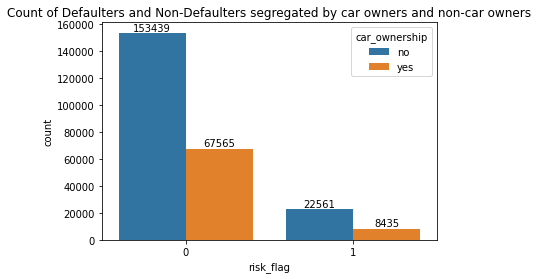

In [25]:
ax = sns.countplot(df['risk_flag'],hue=df['car_ownership'])
print(df.groupby(['car_ownership','risk_flag'])['car_ownership'].count())
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Count of Defaulters and Non-Defaulters segregated by car owners and non-car owners")

In [26]:
lst1 = df.groupby(['car_ownership','risk_flag'])['car_ownership'].count()

In [27]:
lst1

car_ownership  risk_flag
no             0            153439
               1             22561
yes            0             67565
               1              8435
Name: car_ownership, dtype: int64

In [28]:
print("Total number of people who don't own a car are: " + str((lst1[0]+lst1[1])))
print("Total number of people who own a car are: " + str((lst1[2]+lst1[3])))

Total number of people who don't own a car are: 176000
Total number of people who own a car are: 76000


In [29]:
print("Percentage of non-car owners who are defaulters is: " + str(round(lst1[1]/(lst1[0]+lst1[1])*100,2)) + ' %')

Percentage of non-car owners who are defaulters is: 12.82 %


In [30]:
print("Percentage of car owners who are defaulters is: " + str(round(lst1[3]/(lst1[2]+lst1[3])*100,2)) + ' %')

Percentage of car owners who are defaulters is: 11.1 %


In [31]:
# We can see from the above percentages there is no significant impact on loan defaulting given a person has a car or not.
# Out of all car owners, around 11.1% defaulted on their loans where in non-car owners, around 12.82% did.

house_ownership  risk_flag
norent_noown     0              6469
                 1               715
owned            0             11758
                 1              1160
rented           0            202777
                 1             29121
Name: house_ownership, dtype: int64


Text(0.5, 1.0, 'Count of Defaulters and Non-Defaulters segregated by people living in own, rented, norent_noown apartments')

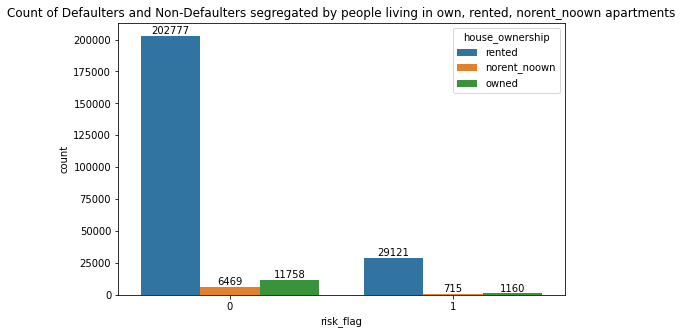

In [32]:
plt.figure(figsize=(8,5))
ax = sns.countplot(df['risk_flag'],hue=df['house_ownership'])
print(df.groupby(['house_ownership','risk_flag'])['house_ownership'].count())
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Count of Defaulters and Non-Defaulters segregated by people living in own, rented, norent_noown apartments")

In [33]:
lst3 = df.groupby(['house_ownership','risk_flag'])['house_ownership'].count()

In [34]:
print("Percentage of norent_noown house owners who are defaulters is: " + str(round(lst3[1]/(lst3[0]+lst3[1])*100,2)) + ' %')

Percentage of norent_noown house owners who are defaulters is: 9.95 %


In [35]:
print("Percentage of owned house owners who are defaulters is: " + str(round(lst3[3]/(lst3[2]+lst3[3])*100,2)) + ' %')

Percentage of owned house owners who are defaulters is: 8.98 %


In [36]:
print("Percentage of rented house owners who are defaulters is: " + str(round(lst3[5]/(lst3[4]+lst3[5])*100,2)) + ' %')

Percentage of rented house owners who are defaulters is: 12.56 %


In [37]:
# We can see that even though there is no significant difference between defaulters of different category of house owners,
# the risk of default increases a little bit when a person is living in a rented house when compared to norent_noown or owned categories.

Text(0.5, 1.0, 'Distribution of income in our dataset')

<Figure size 432x432 with 0 Axes>

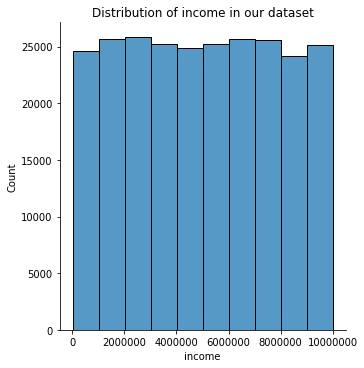

In [38]:
plt.figure(figsize=(6,6))
sns.displot(df['income'],bins=10)
plt.ticklabel_format(style='plain')
plt.title("Distribution of income in our dataset")

In [39]:
lst4 = df.groupby('risk_flag')['income'].median()

In [40]:
lst4 = pd.to_numeric(lst4, downcast = 'float')
lst4

risk_flag
0    5002134.0
1    4977653.0
Name: income, dtype: float32

In [41]:
# We can see that the income of people in our dataset is fairly distributed with people from all income groups.
# Also, we can see that the median income for both defaulters and non-defaulters is fairly close.

Text(0.5, 1.0, 'Count of Defaulters and Non-Defaulters segregated by States')

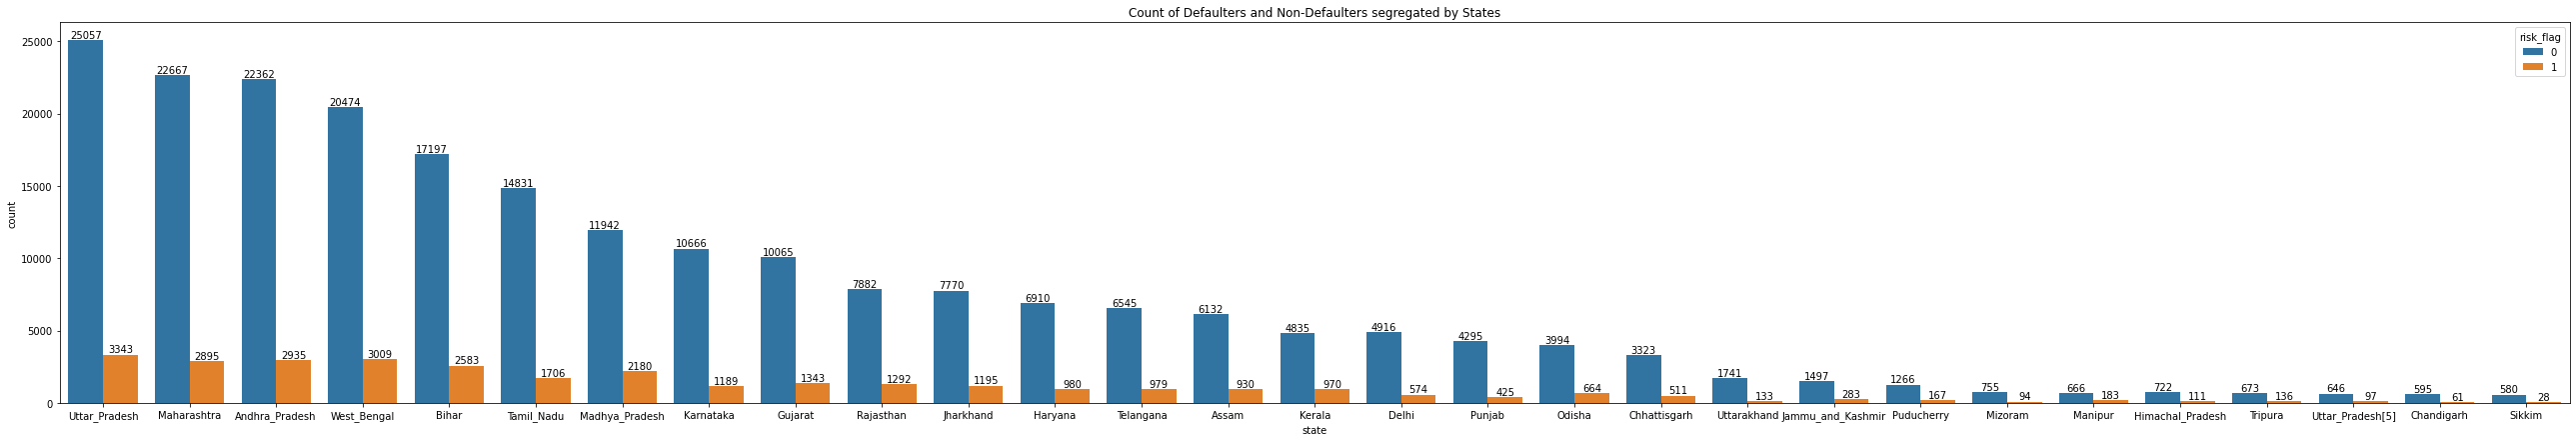

In [42]:
plt.figure(figsize=(45,7))
ax = sns.countplot(df['state'], hue = df['risk_flag'], order=df['state'].value_counts(ascending=False).index)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.title("Count of Defaulters and Non-Defaulters segregated by States")

#print(df.groupby(['state','risk_flag'])['state'].count())

Text(0.5, 1.0, 'Count of Defaulters and Non-Defaulters segregated by Profession')

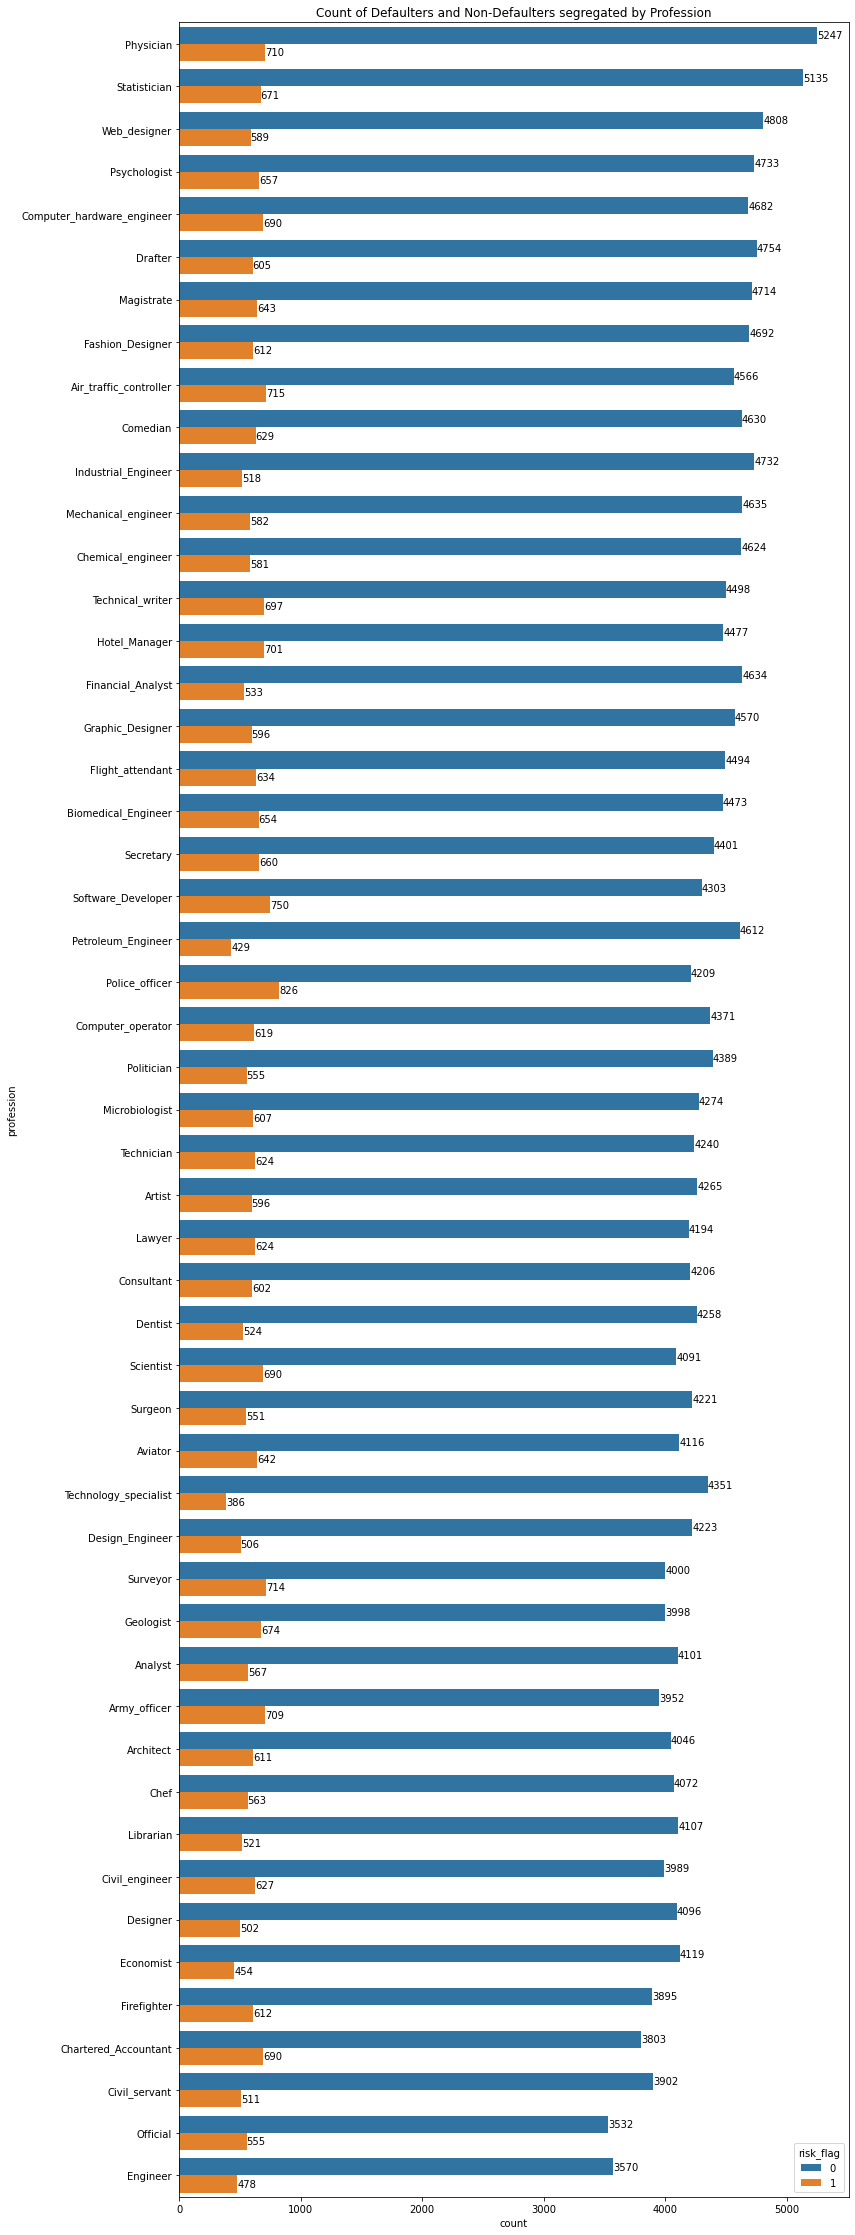

In [43]:
plt.figure(figsize=(12,40))
ax = sns.countplot(y = df['profession'], hue = df['risk_flag'],order=df['profession'].value_counts(ascending=False).index)

for i in ax.containers:
    ax.bar_label(i,)

plt.title("Count of Defaulters and Non-Defaulters segregated by Profession")

#print(df.groupby(['state','risk_flag'])['state'].count())

In [44]:
print(df['profession'].nunique())
print(df['city'].nunique())
print(df['state'].nunique())

51
317
29


In [45]:
# Since the cardinality of columns Profession, City and State is very high, let's drop these columns as they will increase our model complexity.
# Also, we'll drop column ID as it is just a unique identifier.

In [46]:
df.drop(columns={'profession','city','state','Id'}, inplace=True)

In [47]:
# Now, let's one hot encode the variables married, car_ownership and house_ownership as these can't be used directly in our model.

In [48]:
categorical_cols = ['married','car_ownership','house_ownership']

In [49]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [50]:
df.head()

,income,age,experience,current_job_years,current_house_years,risk_flag,married_single,car_ownership_yes,house_ownership_owned,house_ownership_rented
0,1303835,23,3,3,13,0,1,0,0,1
1,7574516,40,10,9,13,0,1,0,0,1
2,3991815,66,4,4,10,0,0,0,0,1
3,6256451,41,2,2,12,1,1,1,0,1
4,5768871,47,11,3,14,1,1,0,0,1


In [51]:
df1 = df.copy(deep=True)

In [52]:
df1.head()

,income,age,experience,current_job_years,current_house_years,risk_flag,married_single,car_ownership_yes,house_ownership_owned,house_ownership_rented
0,1303835,23,3,3,13,0,1,0,0,1
1,7574516,40,10,9,13,0,1,0,0,1
2,3991815,66,4,4,10,0,0,0,0,1
3,6256451,41,2,2,12,1,1,1,0,1
4,5768871,47,11,3,14,1,1,0,0,1


In [53]:
# We'll scale the variables which are not between 0 & 1. These include income, age, experience, current_job_years, and current_house_years.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df1['scaled_income'] = scaler.fit_transform(df1['income'].values.reshape(-1,1))
df1['scaled_age'] = scaler.fit_transform(df1['age'].values.reshape(-1,1))
df1['scaled_experience'] = scaler.fit_transform(df1['experience'].values.reshape(-1,1))
df1['scaled_current_job_years'] = scaler.fit_transform(df1['current_job_years'].values.reshape(-1,1))
df1['scaled_current_house_years'] = scaler.fit_transform(df1['current_house_years'].values.reshape(-1,1))

df1.drop(['income', 'age', 'experience', 'current_job_years', 'current_house_years'], axis=1, inplace=True)

In [54]:
# Checking head of our dataframe to see if variables are scaled or not.
df1.head()

,risk_flag,married_single,car_ownership_yes,house_ownership_owned,house_ownership_rented,scaled_income,scaled_age,scaled_experience,scaled_current_job_years,scaled_current_house_years
0,0,1,0,0,1,-1.283145,-1.579603,-1.180232,-0.914131,0.716356
1,0,1,0,0,1,0.895457,-0.583343,-0.014067,0.731036,0.716356
2,0,0,0,0,1,-0.349269,0.940347,-1.013637,-0.639936,-1.427981
3,1,1,1,0,1,0.437526,-0.524740,-1.346827,-1.188325,0.001577
4,1,1,0,0,1,0.268128,-0.173119,0.152528,-0.914131,1.431135


In [55]:
# Creating a dataframe X with all our predictor variables.
X = df1.drop('risk_flag', axis=1)

In [56]:
# Let's find out the VIF factors of all our predictor variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                      feature       VIF
0              married_single  7.790467
1           car_ownership_yes  1.418477
2       house_ownership_owned  1.397621
3      house_ownership_rented  7.634635
4               scaled_income  1.000119
5                  scaled_age  1.000911
6           scaled_experience  1.717673
7    scaled_current_job_years  1.717072
8  scaled_current_house_years  1.001205


In [57]:
# There is a lot of debate as to what can be considered a high VIF value. Some say a value of 4 or 5 is high, whereas others are okay with a value
# of less than 10. For our purpose, let's keep the base at 10 and anything above 10 will be discarded. We did this because only 2 variables, 
# 'married_single' and 'house_ownership_rented' have VIF greater than 5. And we believe that these 2 factors are crucial in identifying whether
# a person will default or not.

In [58]:
# We can see that none of the variables have a very high VIF (>10). So we'll keep all the variables as is.

In [59]:
# Still we can see we have variables with VIF =  7. Let's see if there is any correlation between them.
columns_with_large_vif = vif_data[vif_data.VIF > 5]

In [60]:
columns_with_large_vif = columns_with_large_vif.reset_index(drop=True)

In [61]:
lst5 = []
length = len(columns_with_large_vif)
for i in range(0,length):
  lst5.append(columns_with_large_vif['feature'][i])

<AxesSubplot:>

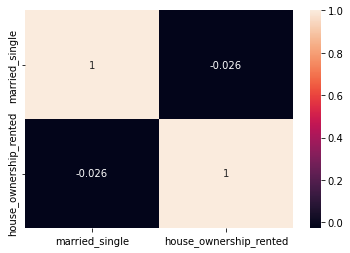

In [62]:
# From the below heatmap, we can clearly see that there is no correlation between these variables whatsoever.
sns.heatmap(X[lst5].corr(), annot=True)

<AxesSubplot:>

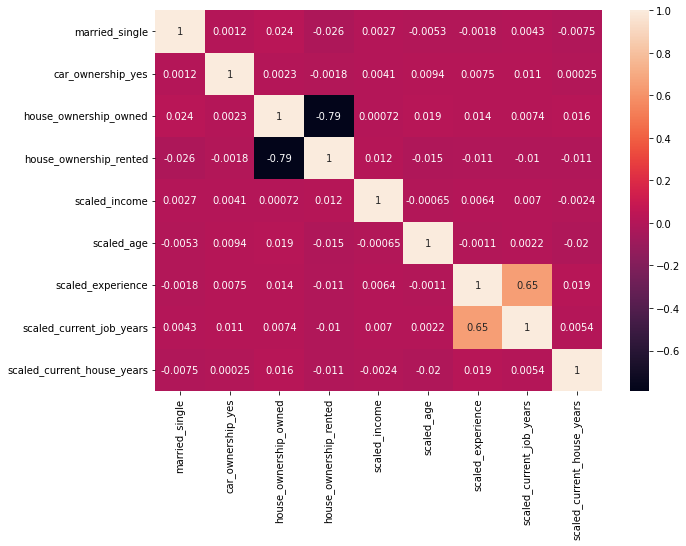

In [63]:
# Now let's look at the correlation between our predictor variables with the help of a heatmap.

plt.figure(figsize=(10,7))
sns.heatmap(df1.drop(['risk_flag'], axis=1).corr(), annot=True)

In [64]:
# We can see that variables house_ownership_owned and house_ownership_rented are highly negatively correlated. 
# Also, experience and current_job_years is highly positively correlated.
# Let's remove one variable out of each pair. Let's remove house_ownership_rented as chances are anybody who doesn't own a home will be living
# in a rented apartment. Also, let's remove current_job_years as experience will be a better representation of the entire dataset.

In [65]:
df1.drop(['house_ownership_rented','scaled_current_job_years'], inplace=True, axis=1)

In [66]:
# Checking if the variables are dropped or not. They have!
df1.head()

,risk_flag,married_single,car_ownership_yes,house_ownership_owned,scaled_income,scaled_age,scaled_experience,scaled_current_house_years
0,0,1,0,0,-1.283145,-1.579603,-1.180232,0.716356
1,0,1,0,0,0.895457,-0.583343,-0.014067,0.716356
2,0,0,0,0,-0.349269,0.940347,-1.013637,-1.427981
3,1,1,1,0,0.437526,-0.524740,-1.346827,0.001577
4,1,1,0,0,0.268128,-0.173119,0.152528,1.431135


<AxesSubplot:>

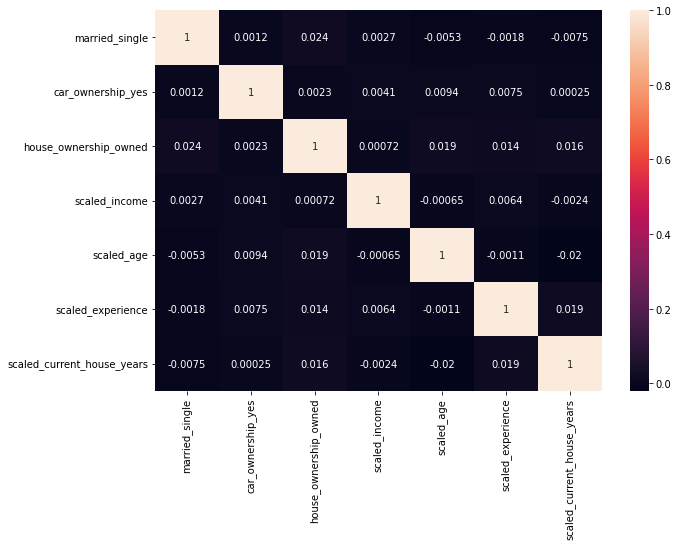

In [67]:
# Now let's look at the correlation between our predictor variables with the help of a heatmap.

plt.figure(figsize=(10,7))
sns.heatmap(df1.drop(['risk_flag'], axis=1).corr(), annot=True)

In [68]:
# We can clearly see that there is no significant correlation between the variables now. So we can move forward with other steps.

**MODEL BUILDING**





In [69]:
# From our EDA, we have identified the predictor variables which we'll be using for model building. Let's now start with other processes.

In [71]:
# Since we have already seen, our dataset is highly imbalanced and we'll have to use some or the other technique to deal with that.
# But before that, let's create a few models with our imbalanced data which will be our 'Baseline' models.
# We'll compare further model performances with these models to evaluate.

In [72]:
# Separating the predictor and dependent variables into X & y variables.

X = df.drop(['risk_flag','current_job_years'], axis=1)
y = df[['risk_flag']]

In [73]:
# Splitting the dataset into training and testing.

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.87726687 0.12273313]
[0.87593254 0.12406746]


In [74]:
# Before doing anything, let's run a vanilla Logistic Regression algorithm with the help of statsmodel library to identify how significant our
# variables are in the prediction of defaulters.

In [75]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.372121
         Iterations 6


In [76]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:              risk_flag   No. Observations:               201600
Model:                          Logit   Df Residuals:                   201592
Method:                           MLE   Df Model:                            7
Date:                Mon, 12 Sep 2022   Pseudo R-squ.:               0.0005761
Time:                        10:23:30   Log-Likelihood:                -75020.
converged:                       True   LL-Null:                       -75063.
Covariance Type:            nonrobust   LLR p-value:                 6.480e-16
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
income                 -1.085e-08   2.33e-09     -4.657      0.000   -1.54e-08   -6.28e-09
age                       -0.0057      0.000    -15.003      0.000      -0.006      -0.005
expe

In [77]:
# From the model summary given above, we can see that all the predictor variables are significant and hence, we can use all of them for our
# classificaation problem.

In [78]:
# We'll be creating 3 classifier models, namely logistic, KNN, and Decision Tree to make classifications.
# Since we'll be using all 3 models with Cross-Validation(CV), we won't scale our data beforehand as it might lead to DATA LEAKAGE issues
# since the same training set is further divided into smaller chunks for training in each cross fold. So the best thing to do is scale our data 
# after dividing data for CV, and for this we'll be using pipelines to ensure everything works smoothly.

In [79]:
# https://ryan-reilly.medium.com/gridsearch-pipelines-of-multiple-models-on-multiclass-classification-e9124b6ea2e3 - SOURCE CODE

In [80]:
# https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook

In [81]:

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])

In [82]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]

lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]

dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[2:]}]

knn_param_grid = [{'KNN__n_neighbors': param_range,
                #   'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]


In [83]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='recall',
        cv=5)

dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='recall',
        cv=5)

knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='recall',
        cv=5)

In [84]:
grids1 = [lr_grid_search, dt_grid_search, knn_grid_search]
for pipe in grids1:
    pipe.fit(X_train,y_train)

In [85]:
grid_dict1 = {0: 'Logistic Regression', 1: 'Decision Trees', 2: 'K-Nearest Neighbors'}
for i, model in enumerate(grids1):
    print('{} Test Recall: {}'.format(grid_dict1[i],
    recall_score(y_test, model.predict(X_test))))
    print('{} Best Params: {}'.format(grid_dict1[i], model.best_params_))

Logistic Regression Test Recall: 0.0
Logistic Regression Best Params: {'LR__C': 1.0, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Decision Trees Test Recall: 0.010554933631856708
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 6, 'DT__min_samples_leaf': 3, 'DT__min_samples_split': 3}
K-Nearest Neighbors Test Recall: 0.4885654885654886
K-Nearest Neighbors Best Params: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5, 'KNN__weights': 'distance'}


In [86]:
grid_dict1 = {0: 'Logistic Regression', 1: 'Decision Trees', 2: 'K-Nearest Neighbors'}
for i, model in enumerate(grids1):
    print('{} Classification Report : \n \n {} \n'.format(grid_dict1[i],
  classification_report(y_test,model.predict(X_test))))

Logistic Regression Classification Report : 
 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.00      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400
 

Decision Trees Classification Report : 
 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.53      0.01      0.02      6253

    accuracy                           0.88     50400
   macro avg       0.70      0.50      0.48     50400
weighted avg       0.83      0.88      0.82     50400
 

K-Nearest Neighbors Classification Report : 
 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     44147
           1       0.55      0.49      0.52      6253

    accuracy                           

In [87]:
# Now we'll make a few changes to our pipelines. We'll add SMOTE function in order to ensure we do oversampling as our dataset is imbalanced.
# Let's see how we perform on our dataset and is it better than our baseline model accuracy (imbalance data accuracy).

In [88]:
# https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html
# https://vch98.medium.com/preventing-data-leakage-standardscaler-and-smote-e7416c63259c

In [89]:

imb_pipe_lr = Pipeline(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('LR', LogisticRegression(random_state = 42))])

imb_pipe_dt = Pipeline(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('DT', DecisionTreeClassifier(random_state = 42))])

imb_pipe_knn = Pipeline(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('KNN', KNeighborsClassifier())])


In [90]:
imb_lr_grid_search = GridSearchCV(estimator = imb_pipe_lr,
        param_grid = lr_param_grid,
        scoring='recall',
        cv=5)

imb_dt_grid_search = GridSearchCV(estimator = imb_pipe_dt,
        param_grid = dt_param_grid,
        scoring='recall',
        cv=5)

imb_knn_grid_search = GridSearchCV(estimator = imb_pipe_knn,
        param_grid = knn_param_grid,
        scoring='recall',
        cv=5)

In [91]:
grids2 = [imb_lr_grid_search, imb_dt_grid_search, imb_knn_grid_search]
for pipe in grids2:
    pipe.fit(X_train,y_train)

In [92]:
# Checking recall values of different models after oversampling our dataset.

grid_dict2 = {0: 'Logistic Regression', 1: 'Decision Trees', 2: 'K-Nearest Neighbors'}
for i, model in enumerate(grids2):
    print('{} Test Recall: {}'.format(grid_dict2[i],
    recall_score(y_test, model.predict(X_test))))
    print('{} Best Params: {}'.format(grid_dict2[i], model.best_params_))

Logistic Regression Test Recall: 0.5454981608827763
Logistic Regression Best Params: {'LR__C': 0.1, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Decision Trees Test Recall: 0.7294098832560371
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 1, 'DT__min_samples_leaf': 1, 'DT__min_samples_split': 3}
K-Nearest Neighbors Test Recall: 0.5672477210938749
K-Nearest Neighbors Best Params: {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5, 'KNN__weights': 'distance'}


In [93]:
grid_dict2 = {0: 'Logistic Regression', 1: 'Decision Trees', 2: 'K-Nearest Neighbors'}
for i, model in enumerate(grids2):
    print('{} Classification Report : \n \n {} \n'.format(grid_dict2[i],
  classification_report(y_test,model.predict(X_test))))

Logistic Regression Classification Report : 
 
               precision    recall  f1-score   support

           0       0.89      0.51      0.64     44147
           1       0.14      0.55      0.22      6253

    accuracy                           0.51     50400
   macro avg       0.51      0.53      0.43     50400
weighted avg       0.79      0.51      0.59     50400
 

Decision Trees Classification Report : 
 
               precision    recall  f1-score   support

           0       0.89      0.31      0.45     44147
           1       0.13      0.73      0.22      6253

    accuracy                           0.36     50400
   macro avg       0.51      0.52      0.34     50400
weighted avg       0.79      0.36      0.43     50400
 

K-Nearest Neighbors Classification Report : 
 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     44147
           1       0.45      0.57      0.50      6253

    accuracy                           

In [94]:

imb_pipe_lr1 = Pipeline(steps = [('nearmiss', NearMiss(version=3, n_neighbors=3)), 
                      ('standardscaler', StandardScaler()),
                      ('LR', LogisticRegression(random_state = 42))])

imb_pipe_dt1 = Pipeline(steps = [('nearmiss', NearMiss(version=3, n_neighbors=3)), 
                      ('standardscaler', StandardScaler()),
                      ('DT', DecisionTreeClassifier(random_state = 42))])

imb_pipe_knn1 = Pipeline(steps = [('nearmiss', NearMiss(version=3, n_neighbors=3)), 
                      ('standardscaler', StandardScaler()),
                      ('KNN', KNeighborsClassifier())])


In [95]:
imb_lr_grid_search1 = GridSearchCV(estimator = imb_pipe_lr1,
        param_grid = lr_param_grid,
        scoring='recall',
        cv=5)

imb_dt_grid_search1 = GridSearchCV(estimator = imb_pipe_dt1,
        param_grid = dt_param_grid,
        scoring='recall',
        cv=5)

imb_knn_grid_search1 = GridSearchCV(estimator = imb_pipe_knn1,
        param_grid = knn_param_grid,
        scoring='recall',
        cv=5)

In [96]:
grids3 = [imb_lr_grid_search1, imb_dt_grid_search1, imb_knn_grid_search1]
for pipe in grids3:
    pipe.fit(X_train,y_train)

In [97]:
# Checking recall values of different models after oversampling our dataset.

grid_dict3 = {0: 'Logistic Regression', 1: 'Decision Trees', 2: 'K-Nearest Neighbors'}
for i, model in enumerate(grids3):
    print('{} Test Recall: {}'.format(grid_dict3[i],
    recall_score(y_test,model.predict(X_test))))
    print('{} Best Params: {}'.format(grid_dict3[i], model.best_params_))

Logistic Regression Test Recall: 0.9884855269470654
Logistic Regression Best Params: {'LR__C': 0.1, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Decision Trees Test Recall: 1.0
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 1, 'DT__min_samples_leaf': 1, 'DT__min_samples_split': 3}
K-Nearest Neighbors Test Recall: 0.08699824084439468
K-Nearest Neighbors Best Params: {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1, 'KNN__weights': 'uniform'}


In [98]:
grid_dict3 = {0: 'Logistic Regression', 1: 'Decision Trees', 2: 'K-Nearest Neighbors'}
for i, model in enumerate(grids3):
    print('{} Classification Report : \n \n {} \n'.format(grid_dict3[i],
  classification_report(y_test,model.predict(X_test))))

Logistic Regression Classification Report : 
 
               precision    recall  f1-score   support

           0       0.93      0.02      0.04     44147
           1       0.13      0.99      0.22      6253

    accuracy                           0.14     50400
   macro avg       0.53      0.50      0.13     50400
weighted avg       0.83      0.14      0.06     50400
 

Decision Trees Classification Report : 
 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     44147
           1       0.12      1.00      0.22      6253

    accuracy                           0.12     50400
   macro avg       0.06      0.50      0.11     50400
weighted avg       0.02      0.12      0.03     50400
 

K-Nearest Neighbors Classification Report : 
 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82     44147
           1       0.05      0.09      0.07      6253

    accuracy                           

In [99]:
# From the 3 methods we used to train multiple models (Imbalanced dataset, oversampling, and undersampling), we can clearly see that the technique
# of oversampling is giving us the best results. The highest F1 score and the ROC-AUC score is obtianed for KNN (with oversampling), which can be
# used for further classifications.

In [108]:
knn_param_grid = [{'KNN__n_neighbors': param_range,
                    'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]

In [109]:
imb_pipe_knn = Pipeline(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('KNN', KNeighborsClassifier())])

In [110]:
imb_knn_grid_search = GridSearchCV(estimator = imb_pipe_knn,
        param_grid = knn_param_grid,
        scoring='recall',
        cv=5)

In [111]:
imb_knn_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('standardscaler', StandardScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             param_grid=[{'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                             'brute'],
                          'KNN__metric': ['euclidean', 'manhattan'],
                          'KNN__n_neighbors': [1, 2, 3, 4, 5, 6],
                          'KNN__weights': ['uniform', 'distance']}],
             scoring='recall')

In [117]:
imb_knn_grid_search.best_params_

{'KNN__algorithm': 'brute',
 'KNN__metric': 'euclidean',
 'KNN__n_neighbors': 5,
 'KNN__weights': 'distance'}

In [113]:
recall_score(y_test, imb_knn_grid_search.predict(X_test))

0.6027506796737566

In [116]:
print(classification_report(y_test, imb_knn_grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     44147
           1       0.45      0.60      0.51      6253

    accuracy                           0.86     50400
   macro avg       0.69      0.75      0.72     50400
weighted avg       0.88      0.86      0.87     50400



In [122]:
#Save the trained model
# pickling the model
import pickle
filename = 'Final_trained_model.sav'
pickle.dump(imb_knn_grid_search, open(filename,'wb'))

In [123]:
#Loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))